In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import math
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
data=pd.read_excel("BTC2.xlsx")

In [7]:
data

,Tarih,Açılış
0,2011-05-06,3.3
1,2011-05-07,3.5
2,2011-05-08,3.6
3,2011-05-09,3.9
4,2011-05-10,3.8
...,...,...
3632,2021-04-15,62978.6
3633,2021-04-16,63211.6
3634,2021-04-17,61358.3
3635,2021-04-18,60043.2


In [8]:
data=data.set_index('Tarih')


In [9]:
data

,Açılış
Tarih,
2011-05-06,3.3
2011-05-07,3.5
2011-05-08,3.6
2011-05-09,3.9
2011-05-10,3.8
...,...
2021-04-15,62978.6
2021-04-16,63211.6
2021-04-17,61358.3


In [10]:



dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

 
train_data = scaled_data[0:training_data_len, :]


x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
  

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
tf.keras.callbacks.EarlyStopping(
    'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Model
model =Sequential() 
model.add(LSTM(256, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics =["accuracy"])
model.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=[es_callback])

test_data=scaled_data[training_data_len - 60:,:]
x_test= []
y_test= dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
x_test =np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


Epoch 1/100
72/72 [==============================] - 20s 225ms/step - loss: 9.0355e-05 - accuracy: 3.0365e-05 - val_loss: 3.6567e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
72/72 [==============================] - 15s 205ms/step - loss: 4.5532e-06 - accuracy: 6.6642e-04 - val_loss: 2.5107e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
72/72 [==============================] - 13s 185ms/step - loss: 4.1805e-06 - accuracy: 2.0550e-04 - val_loss: 5.0165e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
72/72 [==============================] - 13s 180ms/step - loss: 4.1957e-06 - accuracy: 1.7817e-04 - val_loss: 5.2269e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
72/72 [==============================] - 13s 178ms/step - loss: 6.0835e-06 - accuracy: 4.7048e-04 - val_loss: 2.0675e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
72/72 [==============================] - 13s 180ms/step - loss: 5.1048e-06 - accuracy: 1.8708e-04 - val_loss: 1.5960e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
72/72 [=====================

In [11]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(r2_score(y_test, predictions))

0.9922831321556826


<ipython-input-12-6f5fcde5fa0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahminler']= predictions


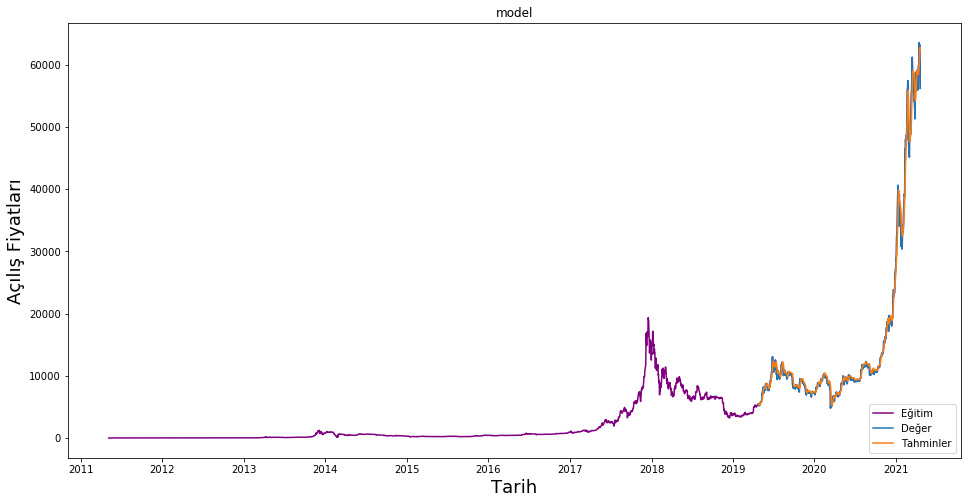

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahminler']= predictions

plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('Açılış Fiyatları', fontsize=18)
plt.plot(data['Açılış'],color="purple")
plt.plot(valid[['Açılış','Tahminler']])
plt.legend(['Eğitim','Değer','Tahminler'],loc='lower right')
plt.show()


<ipython-input-13-f4cd7592530c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahminler']= predictions


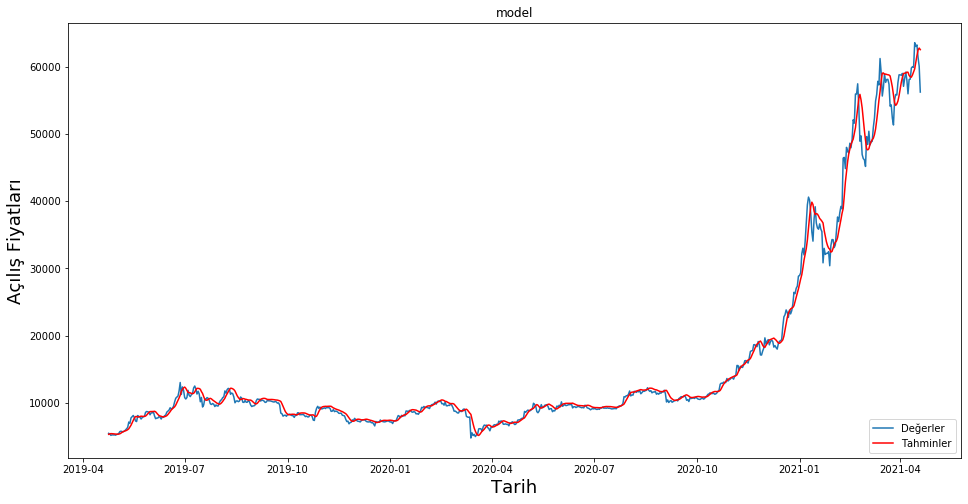

In [13]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahminler']= predictions

plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('Açılış Fiyatları', fontsize=18)
plt.plot(valid['Açılış'])
plt.plot(valid[["Tahminler"]],color="Red")
plt.legend(['Değerler','Tahminler'],loc='lower right')

In [15]:
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
train_dataa= dataset[0:training_data_len, :]
test_dataa=dataset[training_data_len - 60:,:]
train_dataa=pd.DataFrame(train_dataa)
train_dataa.rename(columns={0:'Açılış'}, inplace=True)
test_dataa=pd.DataFrame(test_dataa)
test_dataa.rename(columns={0:'Açılış'}, inplace=True)
total_dataset=pd.concat((train_dataa["Açılış"],test_dataa["Açılış"]),axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-60:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)



real_data=[model_inputs[len(model_inputs) +1-60:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)

print(f"prediction for next day :{prediction}")

prediction for next day :[[61387.773]]
